# Final PJT - EDA & Preprocessing

이해원

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 

plt.rcParams['font.family'] ='D2Coding'
pd.set_option('display.max_columns', None)

In [4]:
customer = pd.read_csv('SDB2_A_ID.csv') # 차주정보
rlps = pd.read_csv('SDB2_I_CT_RLPS.csv') # 보험계약관계자정보

cont = pd.read_csv('SDB2_I_CT_CONT_PVT.csv') # 보험계약정보
mgg = pd.read_csv('SDB2_I_CT_MGG_PVT.csv') # 보험담보정보

pmnt = pd.read_csv('SDB2_I_PT_PMNT.csv') # 청구지급사유정보
pmntdtl = pd.read_csv('SDB2_I_PT_PMNTDTL.csv') # 청구지급상세사유정보

## 1. EDA

### (1) 기초통계량

In [10]:
df_list = [customer, rlps, cont, mgg, pmnt, pmntdtl]

for df in df_list:
    print(df.head(3))
    print(df.info())
    print(df.describe(include='all'))
    print()
    print()

   JOIN_SN  JOIN_SN_TYP  BTH_YR  GENDER  IS_KRN
0   787068            1    1984       2       1
1  1630591            1    2010       2       1
2   746631            1    1985       1       1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49134 entries, 0 to 49133
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   JOIN_SN      49134 non-null  int64
 1   JOIN_SN_TYP  49134 non-null  int64
 2   BTH_YR       49134 non-null  int64
 3   GENDER       49134 non-null  int64
 4   IS_KRN       49134 non-null  int64
dtypes: int64(5)
memory usage: 1.9 MB
None
            JOIN_SN   JOIN_SN_TYP        BTH_YR        GENDER        IS_KRN
count  4.913400e+04  49134.000000  49134.000000  49134.000000  49134.000000
mean   9.851323e+05      1.034559   1944.108357      1.467965      0.982721
std    5.656103e+05      0.260623    258.690600      0.532483      0.130311
min    8.000000e+00      1.000000      0.000000      0.000000      0.0000

### (2) 테이블별 고유값 - customer (차주정보)

In [24]:
for col in customer.columns:
    print(customer[col].value_counts())

JOIN_SN
248157     2
1458299    1
552475     1
1753316    1
1089525    1
          ..
831928     1
288760     1
1571575    1
852892     1
945641     1
Name: count, Length: 49133, dtype: int64
JOIN_SN_TYP
1    48285
3      849
Name: count, dtype: int64
BTH_YR
2010    4576
1935     857
0        849
1995     740
1996     732
        ... 
1940     286
1939     268
1938     245
1937     229
1936     189
Name: count, Length: 77, dtype: int64
GENDER
1    24443
2    23842
0      849
Name: count, dtype: int64
IS_KRN
1    48285
0      849
Name: count, dtype: int64


In [38]:
# 아이디 248157의 고유값 2건 (개인, 법인)

get_248157 = customer[customer['JOIN_SN'] == 248157]
get_248157

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN
21376,248157,1,2008,2.0,1
44659,248157,3,0,0.0,0


📌 노트

- JOIN_SN
    - 아이디 248157의 고유값 2건 (개인, 법인)

- JOIN_SN_TYP
    - 3(법인) drop

- BTH_YR
    - 0(법인) drop
    - 특정 연도 기준으로 빼서 나이로 만들기? (ex. 2020년 기준, 2010 -> 11)
        - 2020년 기준으로 가야할 듯

- GENDER
    - 0(법인) drop

- IS_KRN
    - 3(법인) drop

### (3) 테이블별 고유값 - rlps (보험계약관계자정보)

In [5]:
rlps.columns

Index(['JOIN_SN', 'JOIN_SN_TYP', 'SCTR_CD', 'COM_SN', 'IS_ME', 'POL_SN',
       'CT_RLPS_GBN_CD', 'CT_IN_RLTN_CD', 'IS_INDIV', 'GIS_CD'],
      dtype='object')

In [50]:
for col in rlps.columns:
    print(rlps[col].value_counts())

JOIN_SN
422192     60
30415      60
1433558    59
1326127    57
1825700    55
           ..
948018      1
929960      1
57148       1
1607816     1
398523      1
Name: count, Length: 46050, dtype: int64
JOIN_SN_TYP
1    379028
Name: count, dtype: int64
SCTR_CD
6    215888
8    141999
3     21141
Name: count, dtype: int64
COM_SN
4141313    57
6410498    51
9258094    51
3959483    48
5184030    48
           ..
3760529     1
1326356     1
4510210     1
3903323     1
3381776     1
Name: count, Length: 148434, dtype: int64
IS_ME
0    379028
Name: count, dtype: int64
POL_SN
750334     162
8101729    134
4733442    128
4906431    103
9564504     96
          ... 
3453573      1
6858800      1
7454276      1
4552824      1
9954010      1
Name: count, Length: 248753, dtype: int64
CT_RLPS_GBN_CD
I    229101
C    149927
Name: count, dtype: int64
CT_IN_RLTN_CD
1     247674
99     88520
3      32698
2       9183
5        488
6        465
Name: count, dtype: int64
IS_INDIV
1    378021
0      1007


**[CT_RLPS_GBN_CD]**
- I    229101 피보험자
- C    149927 계약자

In [6]:
# 계약자-피보험자 관계 코드가 1(본인)인 id
get_1 = rlps[rlps['CT_IN_RLTN_CD'] == 1]
get_1

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,POL_SN,CT_RLPS_GBN_CD,CT_IN_RLTN_CD,IS_INDIV,GIS_CD
1,15110,1,8,6937331,0,2197182,C,1,1,11
3,1412979,1,8,8532740,0,5984883,I,1,1,31
4,451383,1,6,8845001,0,6088957,I,1,1,31
5,745358,1,8,1270388,0,566902,C,1,1,31
6,56423,1,8,8713737,0,254040,C,1,1,38
...,...,...,...,...,...,...,...,...,...,...
379023,1482703,1,8,3685558,0,9493522,C,1,1,99
379024,368880,1,6,7497975,0,3084080,C,1,1,99
379025,1284883,1,6,9279409,0,8695881,I,1,1,11
379026,1567278,1,8,9281635,0,8145242,C,1,1,37


In [8]:
get_451383 = rlps[rlps['JOIN_SN'] == 451383]
get_451383

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,POL_SN,CT_RLPS_GBN_CD,CT_IN_RLTN_CD,IS_INDIV,GIS_CD
4,451383,1,6,8845001,0,6088957,I,1,1,31
5294,451383,1,6,8845001,0,3636010,I,1,1,31
43695,451383,1,6,8845001,0,4481487,C,1,1,31
47266,451383,1,6,8845001,0,3762187,I,1,1,31
48428,451383,1,6,8845001,0,2978934,C,1,1,31
80986,451383,1,6,8845001,0,6540878,I,1,1,31
89669,451383,1,6,8845001,0,1651546,I,1,1,31
95859,451383,1,6,8845001,0,2978934,I,1,1,31
107263,451383,1,6,8845001,0,3636010,C,1,1,31
114959,451383,1,6,8845001,0,9700775,C,1,1,31


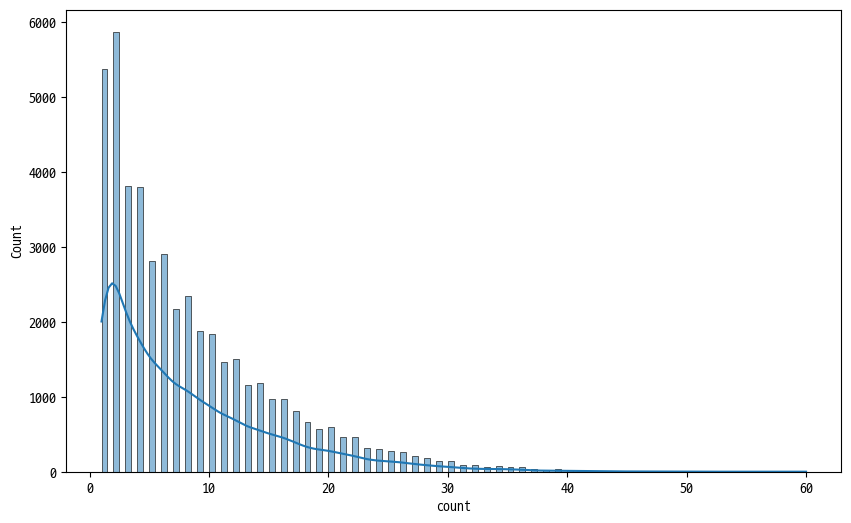

In [61]:
# join_sn 고유값 histplot

id_count = rlps['JOIN_SN'].value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(id_count, kde=True)
plt.show()

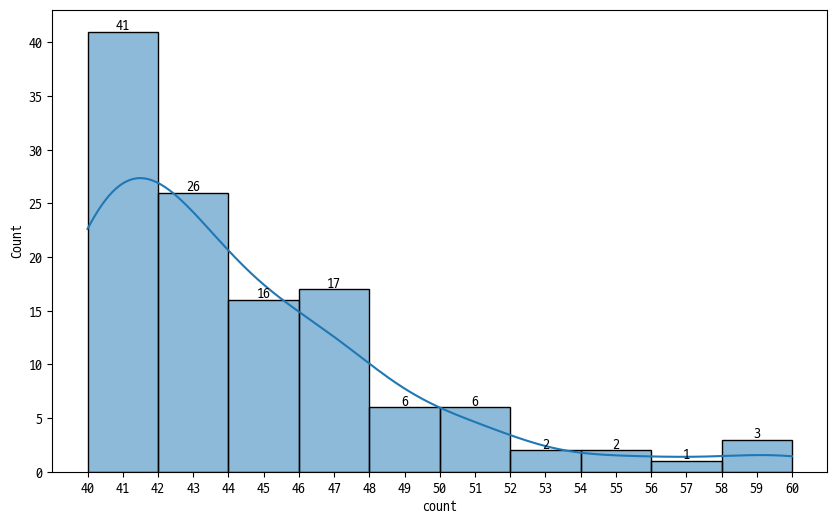

In [68]:
# join_sn 고유값이 40개 이상인 것 histplot 

id_count = rlps['JOIN_SN'].value_counts()
id_count_over40 = id_count[id_count >= 40]

plt.figure(figsize=(10, 6))
hist = sns.histplot(id_count_over40, kde=True)

plt.xticks(range(40, 61, 1))

for bar in hist.containers[0]:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(int(height)), ha='center', va='bottom')

plt.show()

📌 노트

- JOIN_SN
    - 아이디 248157의 고유값이 많은 로우가 있음
    - e.g., 422192 -> 60건, 즉 422192 고객은 계약은 60건이나 한 셈
    - 이외에도 40~50건대도 다수
        - 만료/실효된 계약도 포함된 것? 
    - 이상치라기보다는 우수고객으로 분류 가능할 듯함

- JOIN_SN_TYP
    - 차주 구분코드. 1만 있음

- SCTR_CD
    - 업권코드. **drop**

- COM_SN
    - 기관일련번호. **drop**

- IS_ME
    - 자사여부. **drop**

- POL_SN
    - 증권번호.

- CT_RLPS_GBN_CD
    - 계약관계자유형코드. C 계약자, I 피보험자
    - a.계약자(C), b.C=I인 것들 남기고 drop?

- CT_IN_RLTN_CD
    - 계약자-피보험자 관계코드. 01(본인), 나머지는 가족 등등.

- IS_INDIV 
    - 개인 여부. 1개인, 0법인등등
    - **컬럼 자체 drop?**

- GIS_CED
    - 거주지역코드. 추후 시각화에서 활용

### (4) 테이블별 고유값 - cont (보험계약정보)

In [72]:
cont.head()

,SCTR_CD,POL_SN,IS_GRP_INS,INS_GBN_CD,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,CT_RST_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,IS_CT_DIGNS,CT_JDGMT_CD,CT_CHNL_CD,YM_201806,YM_201807,YM_201808,YM_201809,YM_201810,YM_201811,YM_201812,YM_201901,YM_201902,YM_201903,YM_201904,YM_201905,YM_201906,YM_201907,YM_201908,YM_201909,YM_201910,YM_201911,YM_201912,YM_202001,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006
0,6,3023157,0,3,7,200806,200903,200806,200906,999912,999912,10,2,1,0,1,6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,8,2067576,0,1,2,201012,999912,201012,999912,999912,999912,33,2,20,0,1,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,6,7995898,0,7,2,201409,999912,201409,999912,999912,999912,52,2,30,0,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
3,8,9743978,0,4,7,201604,201704,201604,201704,999912,999912,170,3,1,0,1,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,6,9040681,0,4,2,201804,999912,201804,204804,999912,202006,43,2,25,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [73]:
cont.columns

Index(['SCTR_CD', 'POL_SN', 'IS_GRP_INS', 'INS_GBN_CD', 'INS_CT_STAT_CD',
       'CT_CNCLS_DT', 'CT_TRMNT_DT', 'CT_ST_DT', 'CT_END_DT', 'CT_EFCTV_DT',
       'CT_RST_DT', 'CT_PY_AMT', 'CT_PY_CYCLE_CD', 'CT_PY_PD', 'IS_CT_DIGNS',
       'CT_JDGMT_CD', 'CT_CHNL_CD', 'YM_201806', 'YM_201807', 'YM_201808',
       'YM_201809', 'YM_201810', 'YM_201811', 'YM_201812', 'YM_201901',
       'YM_201902', 'YM_201903', 'YM_201904', 'YM_201905', 'YM_201906',
       'YM_201907', 'YM_201908', 'YM_201909', 'YM_201910', 'YM_201911',
       'YM_201912', 'YM_202001', 'YM_202002', 'YM_202003', 'YM_202004',
       'YM_202005', 'YM_202006'],
      dtype='object')

In [74]:
for col in cont.columns:
    print(cont[col].value_counts())

SCTR_CD
6    230133
8    120854
3     17496
Name: count, dtype: int64
POL_SN
8829621    58
8054287    54
5042810    54
1837302    52
458060     52
           ..
2311822     1
5853209     1
8896942     1
9626998     1
6050915     1
Name: count, Length: 244232, dtype: int64
IS_GRP_INS
0    350905
1     17578
Name: count, dtype: int64
INS_GBN_CD
4     80945
14    65392
3     59954
7     39949
13    25249
1     23706
5     15994
11    15562
10    11503
8      9147
99     5956
2      5185
16     2960
18     2722
6      2428
9      1435
12      312
15       84
Name: count, dtype: int64
INS_CT_STAT_CD
2     178515
5      83188
7      64437
6      15356
4      14491
3       6604
1       2500
10      2258
9        804
8        330
Name: count, dtype: int64
CT_CNCLS_DT
200612    8076
201904    3172
201902    3166
201903    3165
201301    3076
          ... 
200804    1291
200701    1287
200702    1284
200806    1270
200706    1248
Name: count, Length: 163, dtype: int64
CT_TRMNT_DT
999912    2876

In [85]:
# 납입금액 고유값 수
display(cont['CT_PY_AMT'].nunique())

# 납입기간 고유값 수
display(cont['CT_PY_PD'].nunique())

233

100

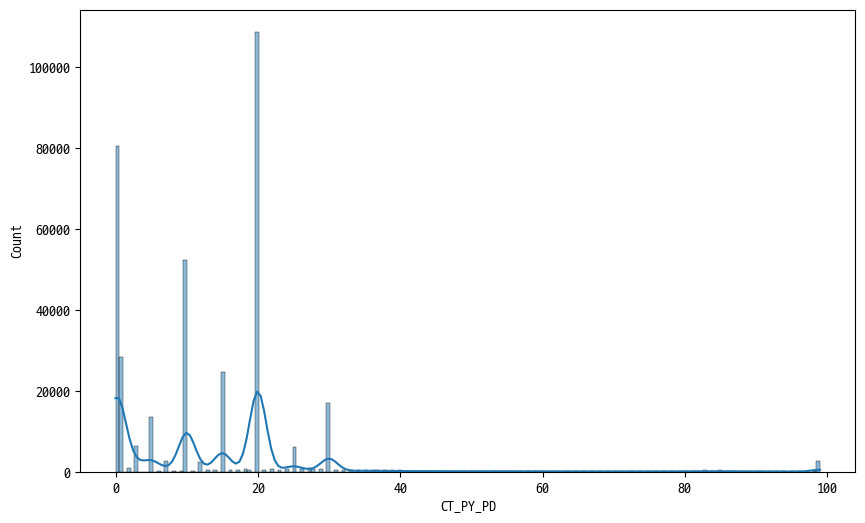

In [88]:
plt.figure(figsize=(10, 6))
sns.histplot(data=cont, x='CT_PY_PD', kde=True)
plt.show()

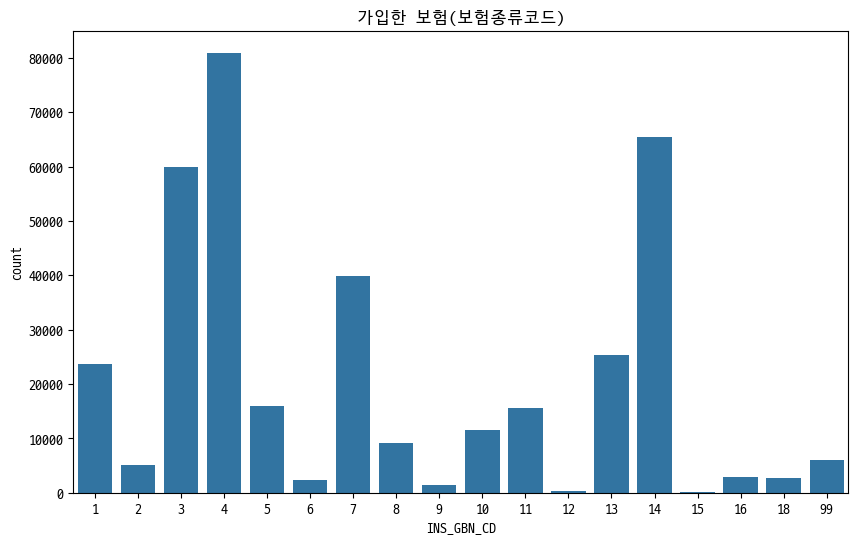

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(data=cont, x='INS_GBN_CD')
plt.title('가입한 보험(보험종류코드)')
plt.show()

C:\Users\LOVE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


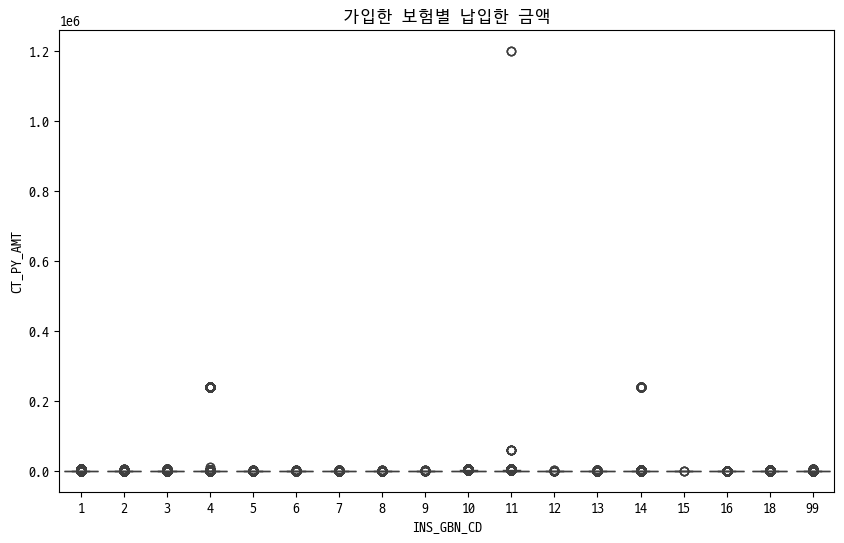

In [8]:
# 가입한 보험별 납입 금액 

plt.figure(figsize=(10, 6))
sns.boxplot(x='INS_GBN_CD', y='CT_PY_AMT', data=cont)
plt.title('가입한 보험별 납입한 금액')
plt.show()

C:\Users\LOVE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


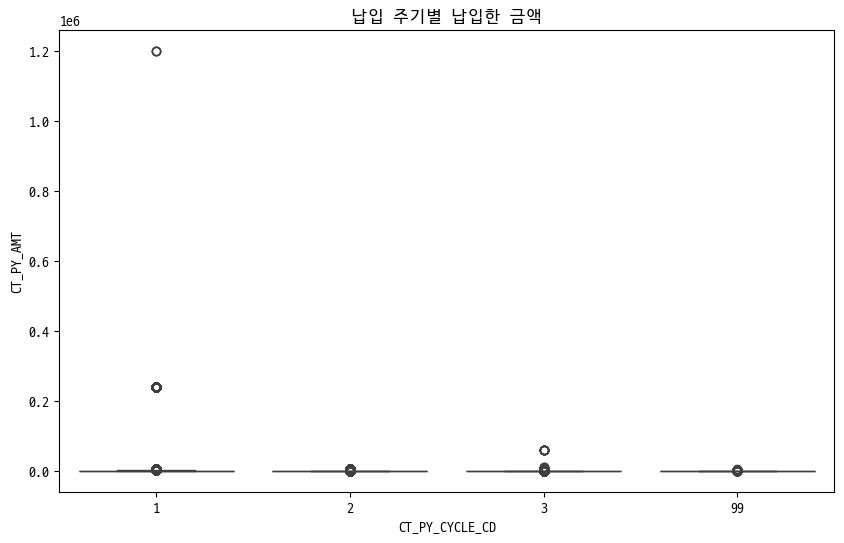

In [9]:
# 납입 주기별 납입 금액 

plt.figure(figsize=(10, 6))
sns.boxplot(x='CT_PY_CYCLE_CD', y='CT_PY_AMT', data=cont)
plt.title('납입 주기별 납입한 금액')
plt.show()

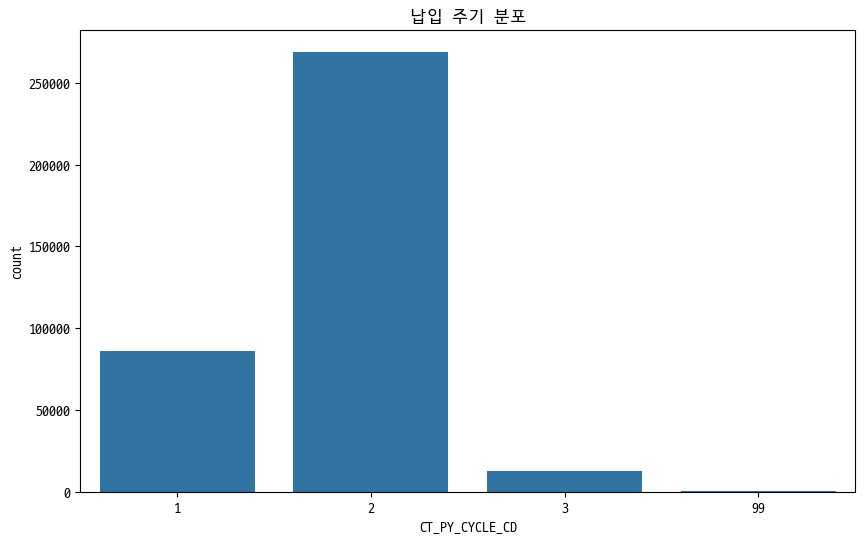

In [12]:
# 납입 주기 분포

plt.figure(figsize=(10, 6))
sns.countplot(data=cont, x='CT_PY_CYCLE_CD')
plt.title('납입 주기 분포')
plt.show()

In [11]:
cont['POL_SN'].nunique()

244232

In [17]:
# cont_over1 = cont[cont['POL_SN'] > 1]

count = cont.groupby('POL_SN').size().reset_index(name='count')
print(count)

         POL_SN  count
0             8      2
1            37      1
2            43      1
3            66      1
4            87      1
...         ...    ...
244227  9997320      2
244228  9997333      2
244229  9997340      1
244230  9997367      1
244231  9997407      1

[244232 rows x 2 columns]


In [18]:
count_over1 = count[count['count'] > 1]
print(count_over1)

         POL_SN  count
0             8      2
11          254      2
20          514      4
21          520      2
22          573      2
...         ...    ...
244222  9997240      2
244223  9997268      3
244225  9997283      6
244227  9997320      2
244228  9997333      2

[70998 rows x 2 columns]


- 증권번호 고유값 수 - 244,232건
- 증권번호(POL_SN)가 같고 차주가 여러명인 경우 - 70,998건

In [21]:
get_254 = cont[cont['POL_SN'] == 254]
get_254

,SCTR_CD,POL_SN,IS_GRP_INS,INS_GBN_CD,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,CT_RST_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,IS_CT_DIGNS,CT_JDGMT_CD,CT_CHNL_CD,YM_201806,YM_201807,YM_201808,YM_201809,YM_201810,YM_201811,YM_201812,YM_201901,YM_201902,YM_201903,YM_201904,YM_201905,YM_201906,YM_201907,YM_201908,YM_201909,YM_201910,YM_201911,YM_201912,YM_202001,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006
163799,6,254,0,3,2,201006,999912,201006,209406,999912,999912,8,2,20,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
212459,6,254,0,3,2,201006,999912,201006,209406,999912,999912,11,2,20,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1


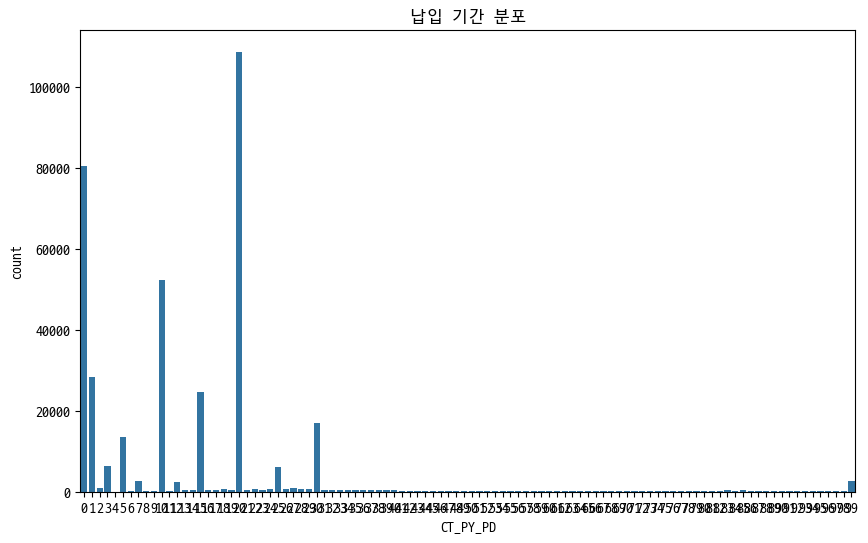

In [23]:
# 납입 기간 분포

plt.figure(figsize=(10, 6))
sns.countplot(data=cont, x='CT_PY_PD')
plt.title('납입 기간 분포')
plt.show()

In [40]:
get_0 = cont[cont['CT_PY_PD'] == 0]
display(get_0['CT_PY_CYCLE_CD'].nunique())
display(get_0[get_0['CT_PY_CYCLE_CD'] != 1])

3

,SCTR_CD,POL_SN,IS_GRP_INS,INS_GBN_CD,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,CT_RST_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,IS_CT_DIGNS,CT_JDGMT_CD,CT_CHNL_CD,YM_201806,YM_201807,YM_201808,YM_201809,YM_201810,YM_201811,YM_201812,YM_201901,YM_201902,YM_201903,YM_201904,YM_201905,YM_201906,YM_201907,YM_201908,YM_201909,YM_201910,YM_201911,YM_201912,YM_202001,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006
546,6,4124295,1,4,5,200708,999912,200708,200808,999912,999912,1000,2,0,0,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
613,8,2665441,0,1,2,200908,999912,200908,999912,999912,999912,80,2,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4320,8,3165730,0,1,7,200612,201103,200612,999912,999912,999912,360,2,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6771,8,8198071,0,1,7,201203,201311,201203,999912,999912,999912,220,2,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
15220,8,1733890,0,1,7,200612,201206,200612,999912,999912,999912,160,2,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345236,8,1168074,0,1,7,201012,201409,201012,999912,999912,999912,240,2,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
352266,8,1653937,0,1,7,200710,200910,200710,999912,999912,999912,550,2,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
359682,8,50921,0,1,2,201203,999912,201203,999912,999912,999912,320,2,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
361541,8,5585630,0,11,4,201512,999912,201512,999912,201604,999912,120,2,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [54]:
get_stat_cd_1 = cont[cont['INS_CT_STAT_CD'] == 1]
get_stat_cd_1

,SCTR_CD,POL_SN,IS_GRP_INS,INS_GBN_CD,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,CT_RST_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,IS_CT_DIGNS,CT_JDGMT_CD,CT_CHNL_CD,YM_201806,YM_201807,YM_201808,YM_201809,YM_201810,YM_201811,YM_201812,YM_201901,YM_201902,YM_201903,YM_201904,YM_201905,YM_201906,YM_201907,YM_201908,YM_201909,YM_201910,YM_201911,YM_201912,YM_202001,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006
181,8,1842605,0,99,1,202006,999912,202006,204906,999912,999912,79,2,20,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
214,3,1643247,0,3,1,202004,999912,202004,204804,999912,999912,27,2,28,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
260,8,9396807,0,3,1,202004,999912,202004,999912,999912,999912,190,2,25,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
518,8,690228,0,1,1,202005,999912,202005,999912,999912,999912,120,2,32,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
627,8,7329696,0,5,1,201707,999912,201707,202707,999912,999912,23,2,10,1,1,6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367623,3,9414254,0,4,1,201806,999912,201806,203806,999912,999912,11,2,20,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
367711,8,5204118,0,3,1,202006,999912,202006,206506,999912,999912,35,2,20,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
367843,8,3190427,0,99,1,201911,999912,201911,205211,999912,999912,30,2,20,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
368042,8,1794862,0,6,1,201905,999912,201905,205205,999912,999912,170,2,10,0,1,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
get_stat_cd_1.describe(include='all')

,SCTR_CD,POL_SN,IS_GRP_INS,INS_GBN_CD,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,CT_RST_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,IS_CT_DIGNS,CT_JDGMT_CD,CT_CHNL_CD,YM_201806,YM_201807,YM_201808,YM_201809,YM_201810,YM_201811,YM_201812,YM_201901,YM_201902,YM_201903,YM_201904,YM_201905,YM_201906,YM_201907,YM_201908,YM_201909,YM_201910,YM_201911,YM_201912,YM_202001,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006
count,2500.000000,2.500000e+03,2500.00000,2500.00000,2500.0,2500.000000,2500.0,2500.000000,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,6.784000,5.018197e+06,0.00640,10.38960,1.0,201892.487200,999912.0,201892.607200,490083.684000,995124.024800,997677.661200,7.520744e+02,2.003200,15.520400,0.012800,1.684800,3.498800,0.076800,0.070800,0.058400,0.046000,0.054800,0.057200,0.080000,0.07280,0.074000,0.077600,0.08320,0.062400,0.044800,0.034400,0.042800,0.045600,0.032800,0.044000,0.044800,0.042000,0.043600,0.036400,0.036400,0.041200,0.037600
std,2.111665,2.906420e+06,0.07976,22.43968,0.0,77.308994,0.0,77.104452,381787.415232,61639.106642,42174.313638,2.400958e+04,1.951592,8.317527,0.112433,8.055918,10.145934,0.266327,0.256542,0.234545,0.209527,0.227635,0.232271,0.271347,0.25986,0.261823,0.267595,0.27624,0.241929,0.206906,0.182291,0.202446,0.208658,0.178148,0.205136,0.206906,0.200629,0.204244,0.187321,0.187321,0.198792,0.190265
min,3.000000,7.676000e+03,0.00000,1.00000,1.0,201011.000000,999912.0,201011.000000,201809.000000,201909.000000,201901.000000,1.000000e+00,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2.524702e+06,0.00000,3.00000,1.0,201811.000000,999912.0,201811.000000,203079.500000,999912.000000,999912.000000,3.300000e+01,2.000000,10.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,5.128534e+06,0.00000,4.00000,1.0,201904.000000,999912.0,201904.000000,205505.500000,999912.000000,999912.000000,6.800000e+01,2.000000,15.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.468237e+06,0.00000,8.00000,1.0,201911.000000,999912.0,201911.000000,999912.000000,999912.000000,999912.000000,1.400000e+02,2.000000,20.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,9.993260e+06,1.00000,99.00000,1.0,202006.000000,999912.0,202006.000000,999912.000000,999912.000000,999912.000000,1.200000e+06,99.000000,61.000000,1.000000,99.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
get_stat_cd_1_sort = get_stat_cd_1.sort_values(by='POL_SN')
get_stat_cd_1_sort.head(10)

,SCTR_CD,POL_SN,IS_GRP_INS,INS_GBN_CD,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,CT_RST_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,IS_CT_DIGNS,CT_JDGMT_CD,CT_CHNL_CD,YM_201806,YM_201807,YM_201808,YM_201809,YM_201810,YM_201811,YM_201812,YM_201901,YM_201902,YM_201903,YM_201904,YM_201905,YM_201906,YM_201907,YM_201908,YM_201909,YM_201910,YM_201911,YM_201912,YM_202001,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006
46024,8,7676,0,1,1,201911,999912,201911,999912,999912,999912,82,2,20,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
160511,8,10216,0,5,1,201811,999912,201811,203311,999912,999912,110,2,15,0,1,2,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
128179,8,12553,0,1,1,201808,999912,201808,999912,999912,999912,47,2,20,0,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
356063,8,24788,0,2,1,201808,999912,201808,203808,999912,999912,16,2,20,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
263951,8,25713,0,3,1,201901,999912,201901,999912,999912,999912,110,2,20,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95949,8,27708,0,5,1,201909,999912,201909,208209,999912,999912,67,2,20,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
291344,8,28979,0,3,1,201911,999912,201911,204411,999912,999912,59,2,20,0,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
167537,8,29226,0,1,1,201905,999912,201905,999912,999912,999912,54,2,12,0,1,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
93212,8,29255,0,99,1,201810,999912,201810,205010,999912,999912,31,2,15,0,1,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
159072,8,30861,0,6,1,201912,999912,201912,205812,999912,999912,94,2,20,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [63]:
get_stat_cd_1_sort['POL_SN'].nunique()

2484

In [64]:
get_stat_cd_1_sort['POL_SN'].value_counts()

POL_SN
9095639    2
7331927    2
5876724    2
6614404    2
3391664    2
          ..
3366419    1
3368006    1
3369839    1
3370477    1
9993260    1
Name: count, Length: 2484, dtype: int64

In [66]:
get_9095639 = get_stat_cd_1_sort[get_stat_cd_1_sort['POL_SN'] == 9095639]
get_9095639

,SCTR_CD,POL_SN,IS_GRP_INS,INS_GBN_CD,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,CT_RST_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,IS_CT_DIGNS,CT_JDGMT_CD,CT_CHNL_CD,YM_201806,YM_201807,YM_201808,YM_201809,YM_201810,YM_201811,YM_201812,YM_201901,YM_201902,YM_201903,YM_201904,YM_201905,YM_201906,YM_201907,YM_201908,YM_201909,YM_201910,YM_201911,YM_201912,YM_202001,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006
126665,8,9095639,0,8,1,201805,999912,201805,202805,999912,999912,16,2,10,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
170265,8,9095639,0,8,1,201805,999912,201805,202805,999912,999912,12,2,10,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [67]:
get_9095639_2 = cont[cont['POL_SN'] == 9095639]
get_9095639_2

,SCTR_CD,POL_SN,IS_GRP_INS,INS_GBN_CD,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,CT_RST_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,IS_CT_DIGNS,CT_JDGMT_CD,CT_CHNL_CD,YM_201806,YM_201807,YM_201808,YM_201809,YM_201810,YM_201811,YM_201812,YM_201901,YM_201902,YM_201903,YM_201904,YM_201905,YM_201906,YM_201907,YM_201908,YM_201909,YM_201910,YM_201911,YM_201912,YM_202001,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006
126665,8,9095639,0,8,1,201805,999912,201805,202805,999912,999912,16,2,10,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
170265,8,9095639,0,8,1,201805,999912,201805,202805,999912,999912,12,2,10,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
194690,8,9095639,0,8,2,201805,999912,201805,202805,999912,999912,16,2,10,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
254929,8,9095639,0,8,2,201805,999912,201805,202805,999912,999912,12,2,10,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


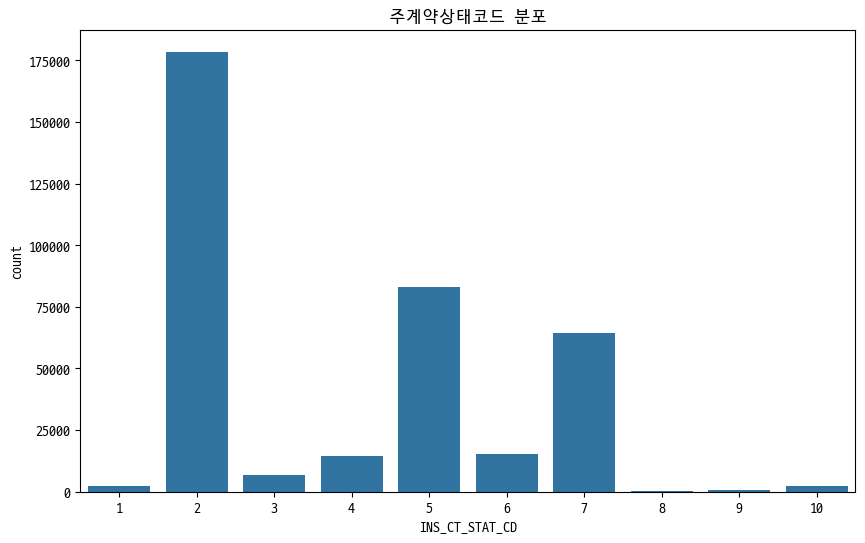

In [68]:
#

plt.figure(figsize=(10, 6))
sns.countplot(data=cont, x='INS_CT_STAT_CD')
plt.title('주계약상태코드 분포')
plt.show()

📌 노트

- SCTR_CD
    - 업권코드. **drop**

- POL_SN
    - 증권번호.

- IS_GRP_INS
    - 단체보험여부. **1 단체(17578건) drop?**

- INS_GBN_CD
    - 보험종류코드. 01~99 총 20개.
    -  더 큰 범위로 묶어서 범주를 좀 줄일 수 없을지?
    - 이상치: 4상해보험, 11저축보험(양로보험 포함), 14여행자보험

- INS_CT_STAT_CD
    - 주계약상태코드. 01~10 총 10개(정상, 철회, 실효, 만기, 해지, 취소 etc)
    - 더 큰 범위로 묶어서 범주를 좀 줄일 수 없을지? 만약 할 거라면 도메인 지식 필요해보임

- 보험계약체결월, 보험계약해지월, 보험시기월(보험 시작 월), 보험종기월(보험 종료 월), 보험실효월, 보험부활월
    - 이거 어디에 쓸 수 있을까요 ... LTV? 밑에 이미 납입기간이 있어서 딱히 ..

- CT_PY_AMT
    - 납입보험료. 단위 천원.

- CT_PY_CYCLE_CD
    - 납입주기코드. 01일시납, 02매월납, 03년납, 99기타

- CT_PY_PD
    - 납입기간. 길수록 우수고객? 단위 월로 추정.

- IS_CT_DIGNS
    - 진단계약여부. **drop**

- CT_JDGMT_CD
    - 인수심사결과코드. drop?
    - 인수심사(=언더라이팅): https://terms.naver.com/entry.naver?docId=15530&cid=43659&categoryId=43659

- CT_CHNL_CD
    - 가입경로코드.
    - 시각화에서 활용?

- YM_YYYYYMM
    - 기준년월들

### (5) 테이블별 고유값 - mgg (보험담보정보)

In [5]:
mgg.head()

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,POL_SN,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,MGG_AMT_MAX,MGG_AMT_MIN,YM_201806,YM_201807,YM_201808,YM_201809,YM_201810,YM_201811,YM_201812,YM_201901,YM_201902,YM_201903,YM_201904,YM_201905,YM_201906,YM_201907,YM_201908,YM_201909,YM_201910,YM_201911,YM_201912,YM_202001,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006
0,499723,1,6,3260523,A5,A5301,1,480,480,480,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,998541,1,6,1272317,A4,A4303,1,400,400,400,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1778522,1,8,3094747,A1,A1400,1,20000,20000,20000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
3,1189610,1,6,7519869,A3,A3300,1,10000,10000,10000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1464515,1,6,1941349,A4,A4299,1,45000,45000,45000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1


In [6]:
mgg.columns

Index(['JOIN_SN', 'JOIN_SN_TYP', 'SCTR_CD', 'POL_SN', 'MGG_GRP_CD', 'MGG_CD',
       'MGG_CNT', 'MGG_AMT_SUM', 'MGG_AMT_MAX', 'MGG_AMT_MIN', 'YM_201806',
       'YM_201807', 'YM_201808', 'YM_201809', 'YM_201810', 'YM_201811',
       'YM_201812', 'YM_201901', 'YM_201902', 'YM_201903', 'YM_201904',
       'YM_201905', 'YM_201906', 'YM_201907', 'YM_201908', 'YM_201909',
       'YM_201910', 'YM_201911', 'YM_201912', 'YM_202001', 'YM_202002',
       'YM_202003', 'YM_202004', 'YM_202005', 'YM_202006'],
      dtype='object')

In [41]:
mgg.describe(include='all')

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,POL_SN,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,MGG_AMT_MAX,MGG_AMT_MIN,YM_201806,YM_201807,YM_201808,YM_201809,YM_201810,YM_201811,YM_201812,YM_201901,YM_201902,YM_201903,YM_201904,YM_201905,YM_201906,YM_201907,YM_201908,YM_201909,YM_201910,YM_201911,YM_201912,YM_202001,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006
count,1.408807e+06,1408807.0,1.408807e+06,1.408807e+06,1408807,1408807,1.408807e+06,1.408807e+06,1.408807e+06,1.408807e+06,1.408807e+06,1.408807e+06,1.408807e+06,1.408807e+06,1.408807e+06,1.408807e+06,1.408807e+06,1.408807e+06,1.408807e+06,1.408807e+06,1.408807e+06,1.408807e+06,1.408807e+06,1.408807e+06,1.408807e+06,1.408807e+06,1.408807e+06,1.408807e+06,1.408807e+06,1.408807e+06,1.408807e+06,1.408807e+06,1.408807e+06,1.408807e+06,1.408807e+06
unique,NaN,NaN,NaN,NaN,13,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,A4,A1300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,385345,73959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.865830e+05,1.0,6.448775e+00,4.973083e+06,NaN,NaN,1.320381e+00,1.495291e+04,1.335901e+04,1.187163e+04,6.721027e-01,6.768869e-01,6.828338e-01,6.883477e-01,6.916256e-01,6.956517e-01,6.997147e-01,7.046416e-01,7.105870e-01,7.163196e-01,7.203272e-01,7.221408e-01,7.227207e-01,7.225773e-01,7.237443e-01,7.262549e-01,7.298360e-01,7.254280e-01,7.293157e-01,7.328392e-01,7.356799e-01,7.382381e-01,7.506323e-01,7.555272e-01,7.593389e-01
std,5.651033e+05,0.0,1.086845e+00,2.892470e+06,NaN,NaN,1.299050e+00,3.154855e+04,2.868541e+04,2.731272e+04,4.694473e-01,4.676657e-01,4.653729e-01,4.631688e-01,4.618222e-01,4.601310e-01,4.583821e-01,4.562039e-01,4.534901e-01,4.507838e-01,4.488386e-01,4.479438e-01,4.476557e-01,4.477270e-01,4.471450e-01,4.458799e-01,4.440446e-01,4.462985e-01,4.443135e-01,4.424772e-01,4.409707e-01,4.395938e-01,4.326472e-01,4.297743e-01,4.274850e-01
min,8.000000e+00,1.0,3.000000e+00,8.000000e+00,NaN,NaN,1.000000e+00,1.000000e+02,1.000000e+02,1.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.984630e+05,1.0,6.000000e+00,2.473357e+06,NaN,NaN,1.000000e+00,2.600000e+02,2.400000e+02,2.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
50%,9.855980e+05,1.0,6.000000e+00,4.983750e+06,NaN,NaN,1.000000e+00,5.400000e+03,4.500000e+03,2.600000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,1.478736e+06,1.0,8.000000e+00,7.466444e+06,NaN,NaN,1.000000e+00,1.300000e+04,1.200000e+04,1.000000e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


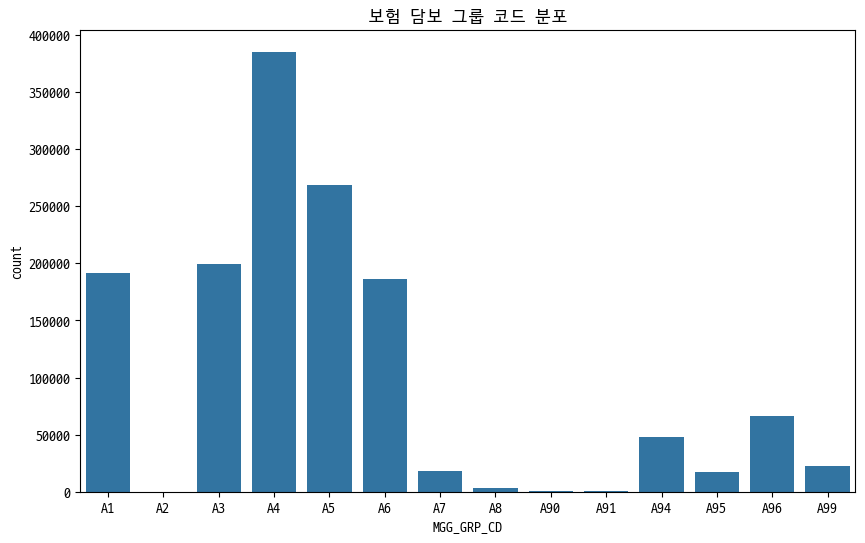

In [23]:
# 보험담보그룹코드 분포
x_order = ['A1', 'A2', 'A3', 'A4','A5', 'A6', 'A7', 'A8', 'A90', 'A91', 'A94', 'A95', 'A96', 'A99']

plt.figure(figsize=(10, 6))
sns.countplot(data=mgg, x='MGG_GRP_CD', order=x_order)
plt.title('보험 담보 그룹 코드 분포')
plt.show()

In [46]:
mgg['MGG_GRP_CD'].value_counts()

MGG_GRP_CD
A4     385345
A5     268941
A3     199762
A1     191546
A6     185905
A96     66005
A94     48174
A99     22210
A7      18494
A95     17282
A8       3530
A90      1054
A91       559
Name: count, dtype: int64

In [47]:
# 상관관계

mgg2 = mgg[['MGG_GRP_CD', 'MGG_AMT_SUM', 'MGG_AMT_MAX', 'MGG_AMT_MIN']]
mgg2.head()

,MGG_GRP_CD,MGG_AMT_SUM,MGG_AMT_MAX,MGG_AMT_MIN
0,A5,480,480,480
1,A4,400,400,400
2,A1,20000,20000,20000
3,A3,10000,10000,10000
4,A4,45000,45000,45000


In [51]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
mgg2['MGG_GRP_CD'] = le.fit_transform(mgg2['MGG_GRP_CD'])
mgg2['MGG_GRP_CD'].head()

C:\Users\LOVE\AppData\Local\Temp\ipykernel_12576\3851255614.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mgg2['MGG_GRP_CD'] = le.fit_transform(mgg2['MGG_GRP_CD'])


0    3
1    2
2    0
3    1
4    2
Name: MGG_GRP_CD, dtype: int32

In [52]:
original_values = le.classes_
integer_mapping = {val: idx for idx, val in enumerate(original_values)}
print("정수 매핑:")
print(integer_mapping)

정수 매핑:
{'A1': 0, 'A3': 1, 'A4': 2, 'A5': 3, 'A6': 4, 'A7': 5, 'A8': 6, 'A90': 7, 'A91': 8, 'A94': 9, 'A95': 10, 'A96': 11, 'A99': 12}


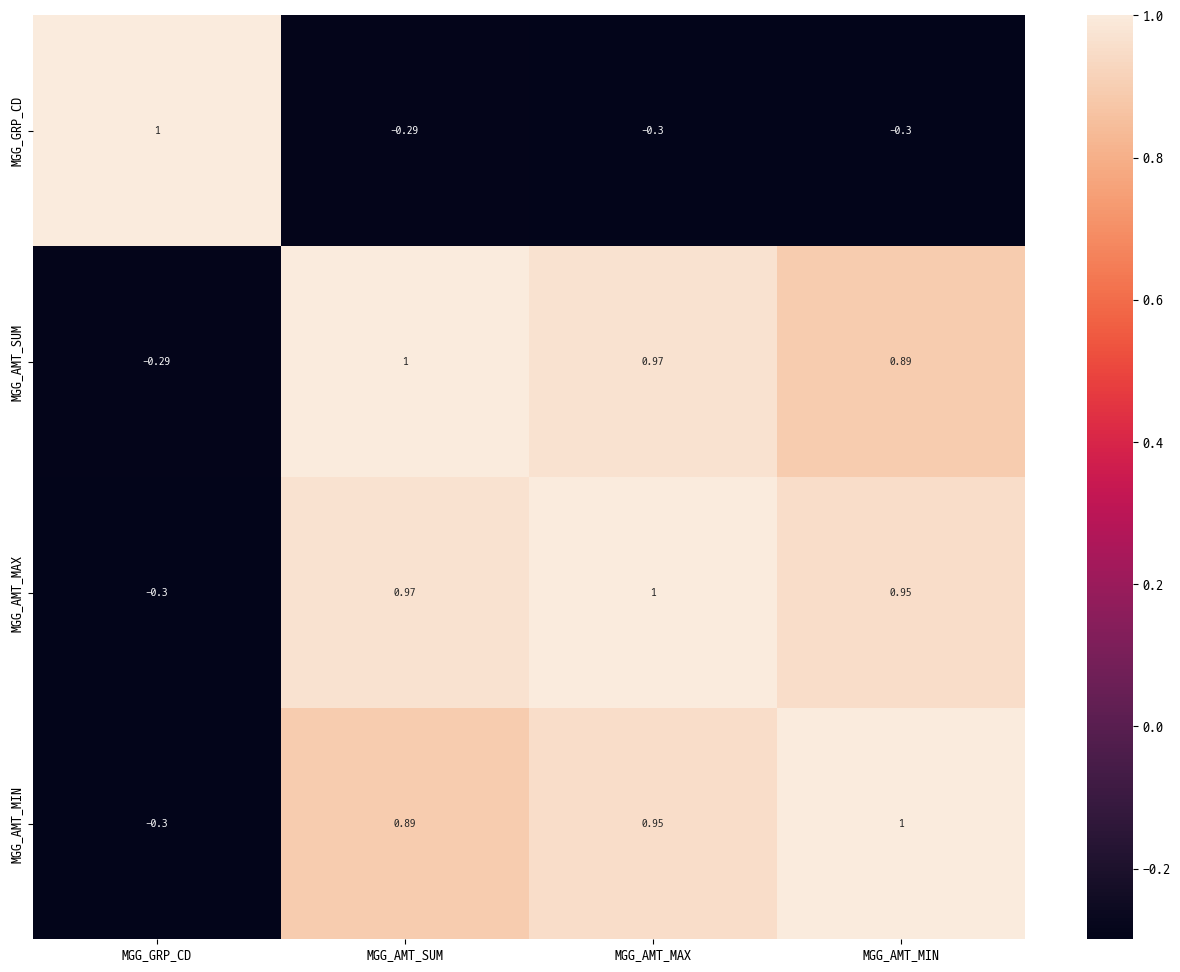

In [53]:
plt.rcParams["figure.figsize"] = (16, 12)
sns.heatmap(mgg2.corr(), annot = True, annot_kws={"size":8})
plt.show()

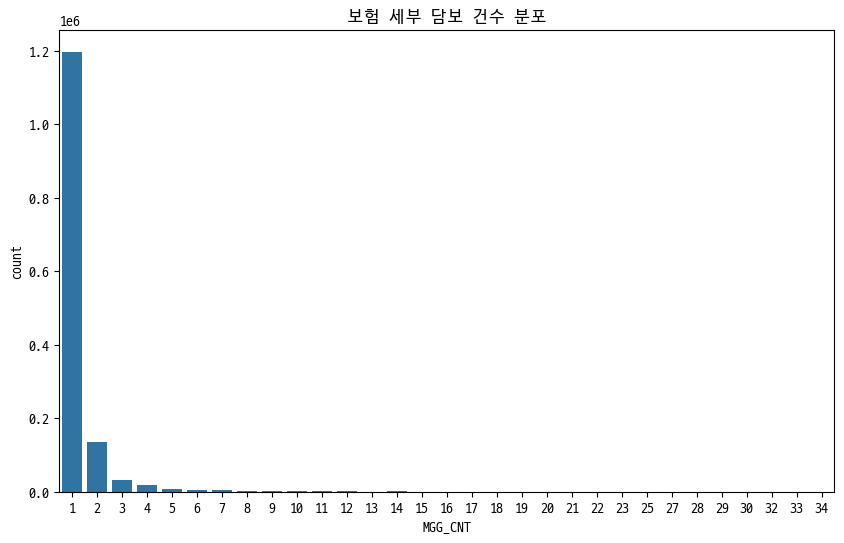

In [45]:
# 보험세부담보건수 분포

plt.figure(figsize=(10, 6))
sns.countplot(data=mgg, x='MGG_CNT')
plt.title('보험 세부 담보 건수 분포')
plt.show()

In [42]:
mgg['MGG_CNT'].value_counts()

MGG_CNT
1     1197754
2      134208
3       30886
4       18691
5        7675
6        4249
7        3607
8        2907
9        2310
10       1561
11       1298
12        872
14        636
13        593
15        527
34        293
33        190
16        167
32        102
17         74
29         61
28         57
18         39
19         24
22          7
20          7
21          5
30          3
23          2
27          1
25          1
Name: count, dtype: int64

C:\Users\LOVE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\LOVE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\LOVE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


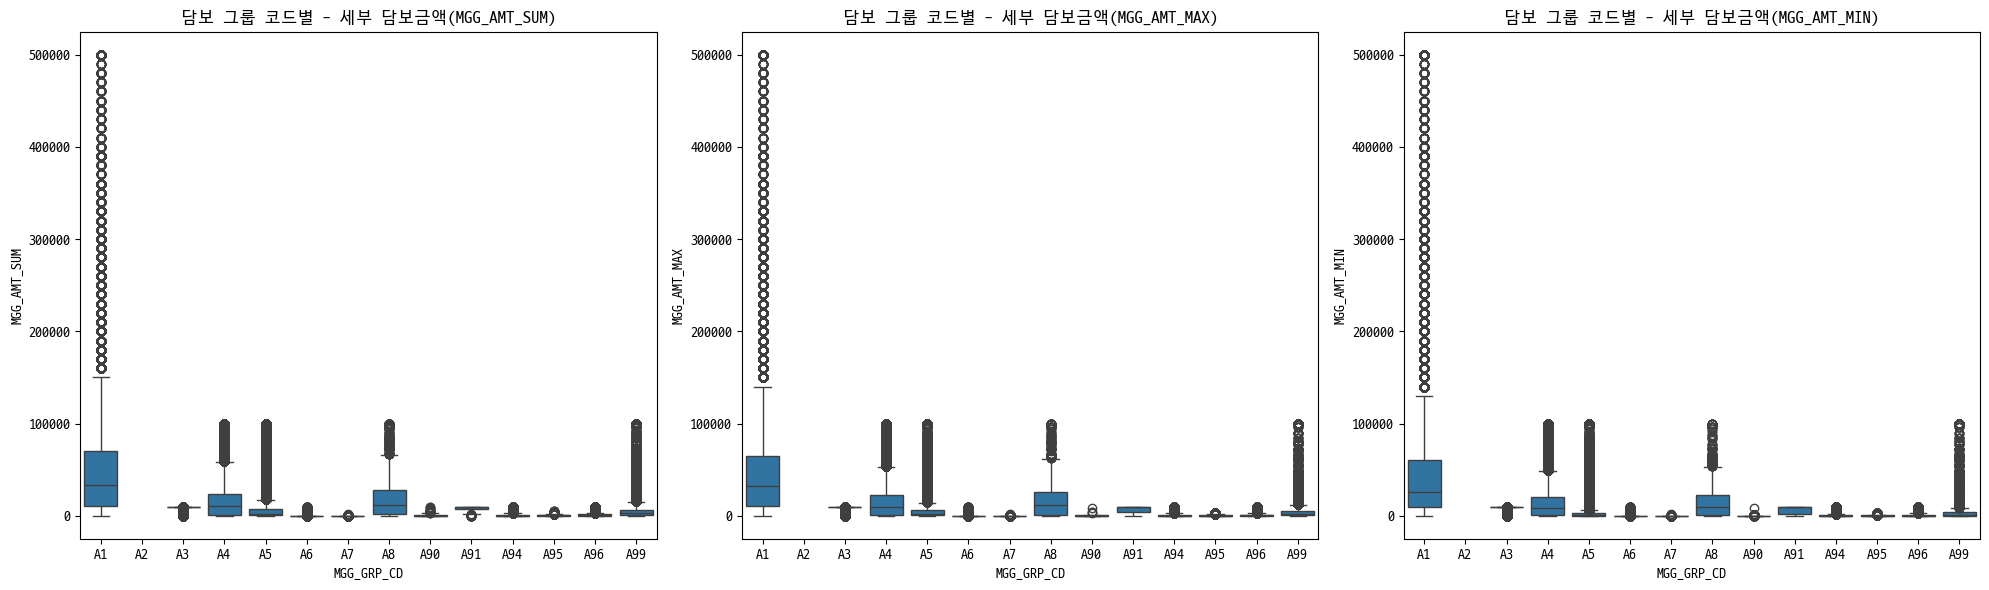

In [22]:
# 보험담보그룹코드별 보험세부담보금액

mgg_amt_list = ['MGG_AMT_SUM', 'MGG_AMT_MAX', 'MGG_AMT_MIN']

plt.figure(figsize=(20,6))

for i, col in enumerate(mgg_amt_list, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=mgg, x='MGG_GRP_CD', y=col, order=x_order)
    plt.title(f"담보 그룹 코드별 - 세부 담보금액({col})")

plt.tight_layout()
plt.show()

📌 노트

- JOIN_SN
    - 차주일련번호. 개인만 남기고 drop

- 차주구분코드, 업권코드
    - **drop**

- POL_SN
    - 증권번호.

- MGG_GRP_CD
    - 보험담보그룹코드. 14개.

- MGG_CD
    - 보험담보코드. 그룹코드 내에서 더 세부적으로 들어온 내용인 듯
    - 범주가 엄청 많아서, drop하고 그룹코드만 쓰거나 축소 필요

- MGG_CNT
    - 보험세부담보건수

- MGG_AMT_ SUM/MAX/MIN
    - 보험세부담보금액 (단위 천원)

- YM_YYYYYMM
    - 기준년월.
    - -> 이 컬럼들 어떻게 활용 ??

### (6) 테이블별 고유값 - acc (청구사고정보)

### (7) 테이블별 고유값 - pmnt (청구지급사유정보)

In [24]:
pmnt.head()

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,INS_GBN_CD,VCTM_SN,PMNT_RESN_CD,PMNT_DT,IS_PMNT_INVST,PMNT_JDGMNT_CD
0,1433170,1818958,6,9641244,4,2547,B2005,202005,0,1
1,797449,671787,6,5047760,17,260,C1008,201808,1,11
2,2715,1162881,6,8072495,17,3152,C1008,201901,1,11
3,1733094,182346,8,6628089,16,2947,B2002,202002,0,1
4,681773,524001,8,9746704,1,652,B2002,201912,0,1


In [25]:
pmnt.columns

Index(['ACCD_SN', 'REQ_SN', 'SCTR_CD', 'POL_SN', 'INS_GBN_CD', 'VCTM_SN',
       'PMNT_RESN_CD', 'PMNT_DT', 'IS_PMNT_INVST', 'PMNT_JDGMNT_CD'],
      dtype='object')

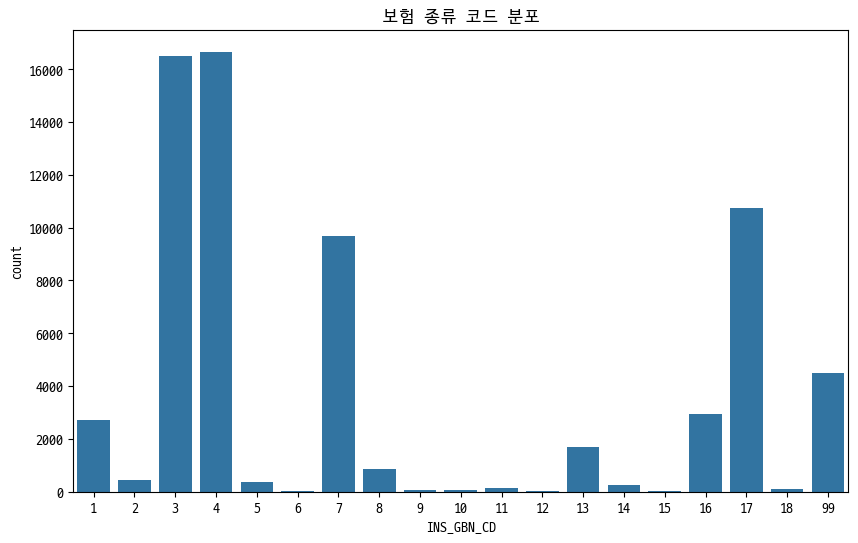

In [26]:
# 보험종류코드 분포

plt.figure(figsize=(10, 6))
sns.countplot(data=pmnt, x='INS_GBN_CD')
plt.title('보험 종류 코드 분포')
plt.show()

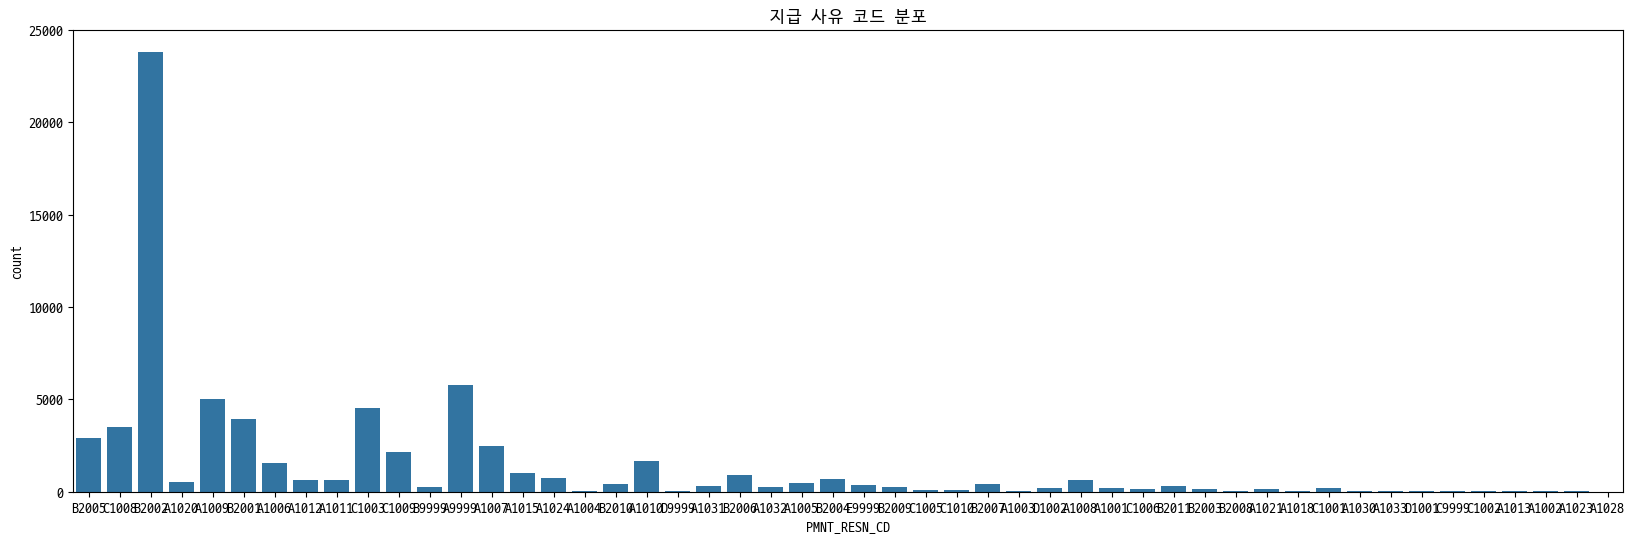

In [28]:
# 지급사유코드 분포

plt.figure(figsize=(20, 6))
sns.countplot(data=pmnt, x='PMNT_RESN_CD')
plt.title('지급 사유 코드 분포')
plt.show()

📌 노트

- **drop** list
    - VCTM_SN(피해자물일련번호)
    - SCTR_CD(업권코드)
    - IS_PMNT_INVST(지급조사여부)

- ACCD_SN
    - 사고일련번호

- REQ_SN
    - 청구일련번호

- POL_SN
    - 증권번호

- INS_GBN_CD
    - 보험종류코드 (01~19, 99 -> 총 20개)
    - 묶어서 범주 축소

- PMNT_RESN_CD
    - 지급사유코드 (약 40개 내외?)

- PMNT_DT
    - 지급월

- PMNT_JDGMNT_CD
    - 지급심사결과코드 (8개)
    - 지급이 확정된 사안만 필터링할건지, 그냥 청구를 한 모든 건에 대해 생각할건지

### (8) 테이블별 고유값 - pmntdtl (청구지급상세사유정보)

In [32]:
pmntdtl.head(3)

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT
0,1132050,953774,8,8482978,1172,A1001,201809,1,1,10000
1,2141286,76910,6,3612735,23,B2001,202001,1,1,9400
2,1493931,1258813,6,9435298,2857,C1003,202003,12,1,600


In [31]:
pmntdtl.columns

Index(['ACCD_SN', 'REQ_SN', 'SCTR_CD', 'POL_SN', 'VCTM_SN', 'PMNT_RESN_CD',
       'PMNT_DT', 'PMNT_RESN_DTL_CD', 'PMNT_DTL_SN', 'PMNT_AMT'],
      dtype='object')

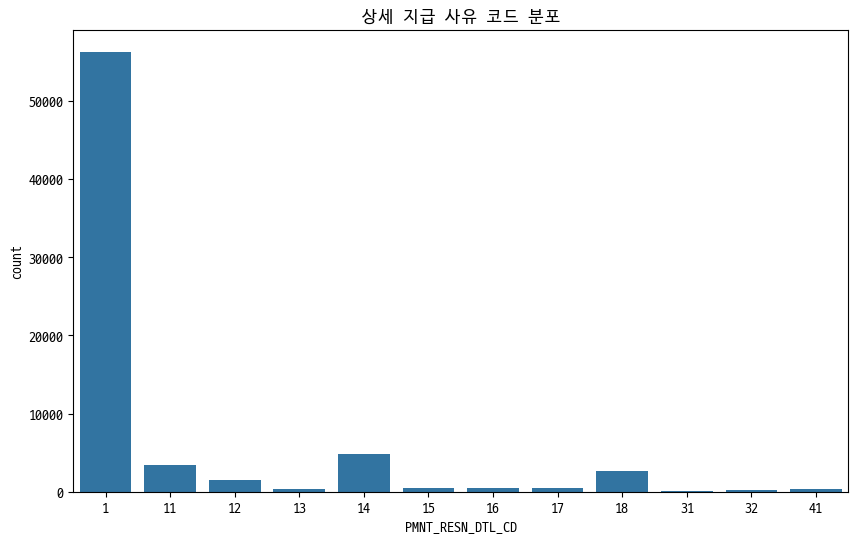

In [34]:
# 상세지급사유코드 분포

plt.figure(figsize=(10, 6))
sns.countplot(data=pmntdtl, x='PMNT_RESN_DTL_CD')
plt.title('상세 지급 사유 코드 분포')
plt.show()

C:\Users\LOVE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


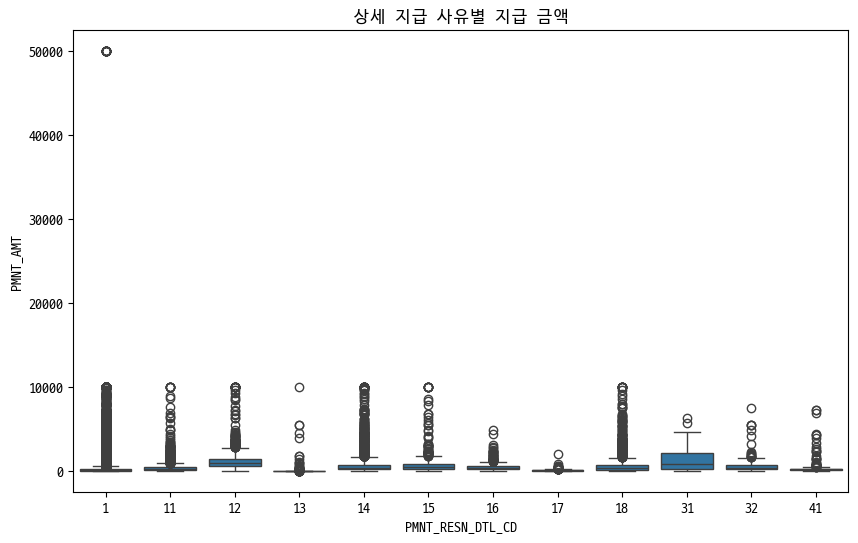

In [35]:
# 지급상세사유별 지급 금액

plt.figure(figsize=(10, 6))
sns.boxplot(data=pmntdtl, x='PMNT_RESN_DTL_CD', y='PMNT_AMT')
plt.title('상세 지급 사유별 지급 금액')
plt.show()

📌 노트

- **drop** list
    - VCTM_SN(피해자물일련번호)
    - SCTR_CD(업권코드)

- ACCD_SN
    - 사고일련번호

- REQ_SN
    - 청구일련번호

- POL_SN
    - 증권번호

- PMNT_RESN_CD
    - 지급사유코드 (약 40개 내외?)

- PMNT_DT
    - 지급월

- PMNT_RESN_DTL_CD
    - 상세지급사유코드 (12개)

- PMNT_DTL_SN
    - 상세지급일련번호

- PMNT_AMT
    - 지급금액